<a href="https://colab.research.google.com/github/lizzydale3/Oceanography-Code/blob/Ocean-215/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Welcome to your beautiful final project
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import xarray as xr
# !pip install cmocean
# !pip install netcdf4
import cmocean
import cmocean.cm as cmo

# !grep '^deb ' /etc/apt/sources.list | \
#   sed 's/^deb /deb-src /g' | \
#   tee /etc/apt/sources.list.d/deb-src.list
# !apt-get -qq update
# !apt-get -qq build-dep python3-cartopy
# !pip uninstall -y shapely
# !pip install shapely --no-binary shapely
# !pip install cartopy

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from scipy.interpolate import griddata

In [ ]:
#filepaths 2016 (particular hotspot year)
baa_max2016_march = '/content/drive/MyDrive/Colab Notebooks/OCEAN 215 - Autumn \'20 - Lizzy Dale/Dale_Final Project/ct5km_baa-max_v3.1_201603.nc'
sst_max2016_march = '/content/drive/MyDrive/Colab Notebooks/OCEAN 215 - Autumn \'20 - Lizzy Dale/Dale_Final Project/ct5km_sst-max_v3.1_201603.nc'
hs_max2016 = '/content/drive/MyDrive/Colab Notebooks/OCEAN 215 - Autumn \'20 - Lizzy Dale/Dale_Final Project/ct5km_hs-max_v3.1_2016.nc'

#2016 openings
df1 = xr.open_dataset(sst_max2016_march)
df2 = xr.open_dataset(hs_max2016)
df3 = xr.open_dataset(baa_max2016_march)

display(df1)


<xarray.Dataset>
Dimensions:                  (lat: 3600, lon: 7200, time: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2016-03-31T12:00:00
  * lat                      (lat) float32 89.975 89.92501 ... -89.975
  * lon                      (lon) float32 -179.975 -179.925 ... 179.975
Data variables:
    mask                     (lat, lon) int8 ...
    sea_surface_temperature  (time, lat, lon) float32 ...
    date                     (time, lat, lon) float32 ...
    crs                      int16 ...
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    title:                      NOAA Coral Reef Watch Global 5km Satellite Se...
    summary:                    This is a product of NOAA Coral Reef Watch Gl...
    references:                 https://coralreefwatch.noaa.gov/satellite/ind...
    institution:                NOAA/NESDIS/STAR Coral Reef Watch program
    history:                    This is a product data file of the NOAA Coral...
    comment:                    This is a product of NOAA Coral Reef Watch Gl...
    license:                    The data produced by Coral Reef Watch are ava...
    id:                         Satellite_Global_5km_CoralTemp_SST_Monthly_Ma...
    naming_authority:           gov.noaa.coralreefwatch
    product_version:            3.1
    uuid:                       3f164b3e-222c-48f9-b2fc-79cfe38e1d57
    date_created:               20180301T120000Z
    date_issued:                20190120T174639Z
    date_modified:              20180301T120000Z
    date_metadata_modified:     20180901T120000Z
    time_coverage_start:        20160301T000000Z
    time_coverage_duration:     P1M
    time_coverage_end:          20160401T000000Z
    time_coverage_resolution:   P1M
    source:                     Coral Reef Watch CoralTemp v1.0
    platform:                   Ships, drifting buoys, moored buoys, TOGA-TAO...
    instrument:                 ATSR-1, ATSR-2, AATSR, AVHRR, AVHRR-2, AVHRR-...
    platform_vocabulary:        NOAA NODC Ocean Archive System Platforms
    instrument_vocabulary:      NOAA NODC Ocean Archive System Instruments
    metadata_link:              https://coralreefwatch.noaa.gov/product/5km/i...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   CF Standard Name Table v27
    geospatial_bounds:          POLYGON((-90.0 180.0, 90.0 180.0, 90.0 -180.0...
    geospatial_bounds_crs:      EPSG:32663
    geospatial_lon_min:         -179.975
    geospatial_lon_max:         179.975
    geospatial_lat_min:         -89.975
    geospatial_lat_max:         89.975
    spatial_resolution:         0.05 degree
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.05
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.05
    acknowledgment:             NOAA Coral Reef Watch program
    creator_type:               group
    creator_institution:        NOAA/NESDIS/STAR Coral Reef Watch program
    creator_name:               NOAA Coral Reef Watch program
    creator_email:              coralreefwatch@noaa.gov
    creator_url:                https://coralreefwatch.noaa.gov
    project:                    NOAA Coral Reef Watch program
    program:                    NOAA Coral Reef Watch program
    publisher_type:             group
    publisher_institution:      NOAA/NESDIS/STAR Coral Reef Watch program
    publisher_name:             NOAA Coral Reef Watch program
    publisher_url:              http://coralreefwatch.noaa.gov
    publisher_email:            coralreefwatch@noaa.gov
    contributor_name:           NOAA Coral Reef Watch program
    contributor_role:           Collecting source data and deriving products;...
    processing_level:           Derived from L4 satellite sea surface tempera...
    cdm_data_typ

In [ ]:
#currently this is the bleaching alert area for march 2016
fig, ax1 = plt.subplots(figsize=(24,8))

ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines(resolution ='10m')
ax1.add_feature(cfeature.LAND, color = 'gainsboro')
ax1.set_title('Bleaching Alert Area March 2016')

g1 = ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color = 'black', linestyle = ':')
g1.top_labels = False
g1.right_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

data_baa = df3['bleaching_alert_area'].squeeze()
lat_baa = data_baa['lat'] # .values
lon_baa = data_baa['lon']

color_baa = ax1.contourf(lon_baa, lat_baa, data_baa, transform=ccrs.PlateCarree(),  cmap = 'Reds')
cbar = plt.colorbar(color_baa, ax=ax1, shrink= 0.8)
cbar.set_label('Alert Level (1 = No stress to 4 = Alert Level 2)')


#zoom in or not
extent = [100,160, -50, 0] #x1, x2, y1, y2, australia
#extent2 = [140,150, -20, -10] #x1, x2, y1, y2, cape york to port douglas
ax1.set_extent(extent)

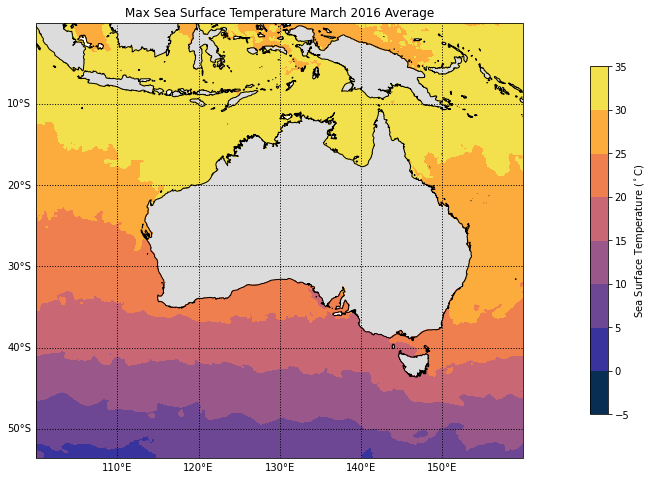

In [ ]:
#the max SST for march 2016 at every location, where 2016 was a particularly strong year
fig, ax2 = plt.subplots(figsize=(24,8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines(resolution ='10m')
ax2.add_feature(cfeature.LAND, color = 'gainsboro')
ax2.set_title('Max Sea Surface Temperature March 2016 Average')

g2 = ax2.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color = 'black', linestyle = ':')
g2.top_labels = False
g2.right_labels = False
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER

data_sst_1603 = df1['sea_surface_temperature'].squeeze()
lat_sst_1603 = data_sst_1603['lat'] # .values
lon_sst_1603 = data_sst_1603['lon']

color_sst_1603 = ax2.contourf(lon_sst_1603, lat_sst_1603, data_sst_1603, transform=ccrs.PlateCarree(),cmap = cmo.thermal)
cbar2 = plt.colorbar(color_sst_1603, ax=ax2, shrink= 0.8)
cbar2.set_label('Sea Surface Temperature ($^\circ$C)')
ax2.set_extent(extent)

,Array,Chunk
Bytes,15.76 GB,103.68 MB
Shape,"(152, 3600, 7200)","(1, 3600, 7200)"
Count,456 Tasks,152 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.76 GB,103.68 MB
Shape,"(152, 3600, 7200)","(1, 3600, 7200)"
Count,456 Tasks,152 Chunks
Type,float32,numpy.ndarray


,Array,Chunk
Bytes,608 B,4 B
Shape,"(152,)","(1,)"
Count,608 Tasks,152 Chunks
Type,float32,numpy.ndarray


Text(0.5, 1.0, 'Max SST in 2016 for January-May')

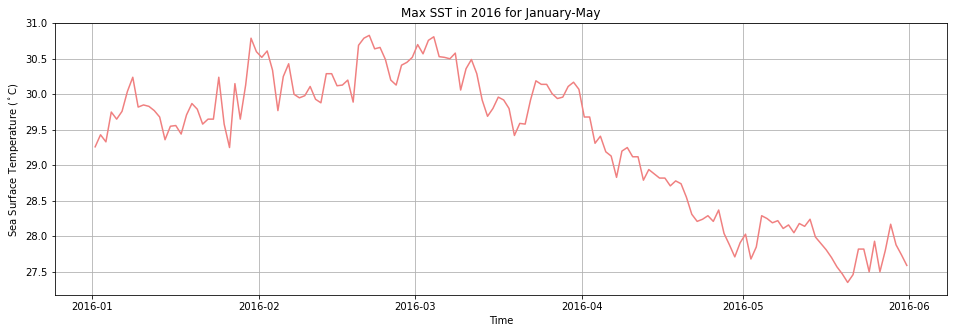

In [ ]:
#attempt at graph of individual days from jan(to show trend) + feb-may(record) of max sst in 2016 since thats an indicator of coral bleaching
daily_data = xr.open_mfdataset('/content/drive/MyDrive/Colab Notebooks/OCEAN 215 - Autumn \'20 - Lizzy Dale/Dale_Final Project/2016 daily sst/*.nc', concat_dim='time', combine = 'by_coords') # chunks={'lat':12, 'lon': 14, 'time':8})
display(daily_data)

aus_daily = daily_data['analysed_sst'].sel(lat = -12.09, lon = 143.45, method = 'nearest') #check variable names
display(aus_daily)

fig, ax3 = plt.subplots(figsize = (16,5))
ax3.plot(aus_daily['time'], aus_daily, color = 'lightcoral')

ax3.grid()
ax3.set_xlabel('Time')
ax3.set_ylabel('Sea Surface Temperature ($^\circ$C)')
ax3.set_title('Max SST in 2016 for January-May')

In [ ]:
# # attempt at coral bleaching map of hotspots for 2016 and 2019
# # why are these so weakly colored
# fig1, ax2 = plt.subplots(figsize=(12,4))

# #2016
# ax2 = plt.axes(projection=ccrs.PlateCarree())
# ax2.coastlines(resolution ='10m')
# ax2.add_feature(cfeature.LAND, color = 'gainsboro')

# g2 = ax2.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color = 'black', linestyle = ':')
# g2.top_labels = False
# g2.right_labels = False
# g2.xformatter = LONGITUDE_FORMATTER
# g2.yformatter = LATITUDE_FORMATTER

# data_hs16 = df16['hotspot'].squeeze()
# lat_hs16 = data_hs16['lat']
# lon_hs16 = data_hs16['lon']

# color_hs16 = ax2.contourf(lon_hs16, lat_hs16, data_hs16, transform=ccrs.PlateCarree(),  cmap = cmo.dense)
# cbar2 = plt.colorbar(color_hs16, ax=ax2, shrink= 0.8)

# #2019
# fig2, ax3 = plt.subplots(figsize=(12,4))
# ax3.plot()
# ax3 = plt.axes(projection=ccrs.PlateCarree())
# ax3.coastlines(resolution ='10m')
# ax3.add_feature(cfeature.LAND, color = 'gainsboro')

# g3 = ax3.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color = 'black', linestyle = ':')
# g3.top_labels = False
# g3.right_labels = False
# g3.xformatter = LONGITUDE_FORMATTER
# g3.yformatter = LATITUDE_FORMATTER

# data_hs19 = df7['hotspot'].squeeze()
# lat_hs19 = data_hs19['lat']
# lon_hs19 = data_hs19['lon']

# color_hs19 = ax3.contourf(lon_hs19, lat_hs19, data_hs19, transform=ccrs.PlateCarree(),  cmap = cmo.thermal)
# cbar3 = plt.colorbar(color_hs19, ax=ax3, shrink= 0.8)
